In [8]:
import os
import json
import cv2
import numpy as np
from PIL import Image

In [5]:
path_to_cityscapes_images_train = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/train/'
path_cityscapes_images_val = '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val'
path_to_cityscapes_images_test = '/mnt/lwll/lwll-coral/hrant/leftImg8bit/test'

In [6]:
!ls -lah /mnt/lwll/lwll-coral/hrant/gtFine/train/aachen

total 40M
drwxr-xr-x  2 hkhachatrian hkhachatrian  696 Feb 16  2016 .
drwxr-xr-x 20 hkhachatrian hkhachatrian   18 Feb 16  2016 ..
-rw-r--r--  1 hkhachatrian hkhachatrian  30K Feb 16  2016 aachen_000000_000019_gtFine_color.png
-rw-r--r--  1 hkhachatrian hkhachatrian  24K Feb 16  2016 aachen_000000_000019_gtFine_instanceIds.png
-rw-r--r--  1 hkhachatrian hkhachatrian  20K Feb 16  2016 aachen_000000_000019_gtFine_labelIds.png
-rw-r--r--  1 hkhachatrian hkhachatrian 204K Feb 16  2016 aachen_000000_000019_gtFine_polygons.json
-rw-r--r--  1 hkhachatrian hkhachatrian  33K Feb 16  2016 aachen_000001_000019_gtFine_color.png
-rw-r--r--  1 hkhachatrian hkhachatrian  26K Feb 16  2016 aachen_000001_000019_gtFine_instanceIds.png
-rw-r--r--  1 hkhachatrian hkhachatrian  23K Feb 16  2016 aachen_000001_000019_gtFine_labelIds.png
-rw-r--r--  1 hkhachatrian hkhachatrian 276K Feb 16  2016 aachen_000001_000019_gtFine_polygons.json
-rw-r--r--  1 hkhachatrian hkhachatrian  25K Feb 16  2016 aachen_000002_000

In [7]:
!ls -lah /mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/train/aachen

total 362M
drwxr-xr-x  2 hkhachatrian hkhachatrian  174 Feb 16  2016 .
drwxr-xr-x 20 hkhachatrian hkhachatrian   18 Feb 16  2016 ..
-rw-r--r--  1 hkhachatrian hkhachatrian 2.1M Feb 16  2016 aachen_000000_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.1M Feb 16  2016 aachen_000001_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.1M Feb 16  2016 aachen_000002_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.2M Feb 16  2016 aachen_000003_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.1M Feb 16  2016 aachen_000004_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.2M Feb 16  2016 aachen_000005_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.1M Feb 16  2016 aachen_000006_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.2M Feb 16  2016 aachen_000007_000019_leftImg8bit.png
-rw-r--r--  1 hkhachatrian hkhachatrian 2.2M Feb 16  2016 aachen_000008_000019_leftImg8bit.png
-rw-r--r--  1

In [8]:
path_to_cityscapes_annot_train = '/mnt/lwll/lwll-coral/hrant'
path_to_cityscapes_annot_val = '/mnt/lwll/lwll-coral/hrant'
path_to_cityscapes_annot_test = '/mnt/lwll/lwll-coral/hrant'

In [26]:
train_images = ['gtFine/train/krefeld/krefeld_000000_011655',
 'gtFine/train/krefeld/krefeld_000000_012353',
 'gtFine/train/krefeld/krefeld_000000_024276',
 'gtFine/train/krefeld/krefeld_000000_006274',
 'gtFine/train/dusseldorf/dusseldorf_000093_000019',
 'gtFine/train/dusseldorf/dusseldorf_000177_000019',
 'gtFine/train/dusseldorf/dusseldorf_000020_000019',
 'gtFine/train/dusseldorf/dusseldorf_000022_000019',
 'gtFine/train/hamburg/hamburg_000000_053086',
 'gtFine/train/hamburg/hamburg_000000_089696',
 'gtFine/train/hamburg/hamburg_000000_032906',
 'gtFine/train/hamburg/hamburg_000000_065983',
 'gtFine/train/bremen/bremen_000233_000019',
 'gtFine/train/bremen/bremen_000161_000019',
 'gtFine/train/bremen/bremen_000182_000019',
 'gtFine/train/bremen/bremen_000126_000019',
 'gtFine/train/ulm/ulm_000054_000019',
 'gtFine/train/ulm/ulm_000040_000019',
 'gtFine/train/ulm/ulm_000064_000019',
 'gtFine/train/ulm/ulm_000081_000019',
 'gtFine/train/cologne/cologne_000144_000019',
 'gtFine/train/cologne/cologne_000016_000019',
 'gtFine/train/cologne/cologne_000013_000019',
 'gtFine/train/cologne/cologne_000028_000019',
 'gtFine/train/zurich/zurich_000117_000019',
 'gtFine/train/zurich/zurich_000082_000019',
 'gtFine/train/zurich/zurich_000049_000019',
 'gtFine/train/zurich/zurich_000011_000019',
 'gtFine/train/erfurt/erfurt_000065_000019',
 'gtFine/train/erfurt/erfurt_000103_000019',
 'gtFine/train/erfurt/erfurt_000039_000019',
 'gtFine/train/erfurt/erfurt_000013_000019',
 'gtFine/train/strasbourg/strasbourg_000000_004951',
 'gtFine/train/strasbourg/strasbourg_000000_014416',
 'gtFine/train/strasbourg/strasbourg_000001_029980',
 'gtFine/train/strasbourg/strasbourg_000001_047755',
 'gtFine/train/tubingen/tubingen_000134_000019',
 'gtFine/train/tubingen/tubingen_000095_000019',
 'gtFine/train/tubingen/tubingen_000136_000019',
 'gtFine/train/tubingen/tubingen_000096_000019',
 'gtFine/train/weimar/weimar_000077_000019',
 'gtFine/train/weimar/weimar_000127_000019',
 'gtFine/train/weimar/weimar_000059_000019',
 'gtFine/train/weimar/weimar_000079_000019',
 'gtFine/train/aachen/aachen_000051_000019',
 'gtFine/train/aachen/aachen_000000_000019',
 'gtFine/train/aachen/aachen_000149_000019',
 'gtFine/train/aachen/aachen_000109_000019',
 'gtFine/train/monchengladbach/monchengladbach_000000_032540',
 'gtFine/train/monchengladbach/monchengladbach_000000_035083',
 'gtFine/train/monchengladbach/monchengladbach_000000_035718',
 'gtFine/train/monchengladbach/monchengladbach_000000_002255',
 'gtFine/train/stuttgart/stuttgart_000195_000019',
 'gtFine/train/stuttgart/stuttgart_000040_000019',
 'gtFine/train/stuttgart/stuttgart_000150_000019',
 'gtFine/train/stuttgart/stuttgart_000161_000019',
 'gtFine/train/jena/jena_000011_000019',
 'gtFine/train/jena/jena_000107_000019',
 'gtFine/train/jena/jena_000083_000019',
 'gtFine/train/jena/jena_000055_000019',
 'gtFine/train/hanover/hanover_000000_048508',
 'gtFine/train/hanover/hanover_000000_025437',
 'gtFine/train/hanover/hanover_000000_003853',
 'gtFine/train/hanover/hanover_000000_031856',
 'gtFine/train/darmstadt/darmstadt_000019_000019',
 'gtFine/train/darmstadt/darmstadt_000071_000019',
 'gtFine/train/darmstadt/darmstadt_000073_000019',
 'gtFine/train/darmstadt/darmstadt_000009_000019',
 'gtFine/train/bochum/bochum_000000_022210',
 'gtFine/train/bochum/bochum_000000_002562',
 'gtFine/train/bochum/bochum_000000_033531',
 'gtFine/train/bochum/bochum_000000_024343']

In [27]:
train_images_small = train_images[::2]
train_images_small

['gtFine/train/krefeld/krefeld_000000_011655',
 'gtFine/train/krefeld/krefeld_000000_024276',
 'gtFine/train/dusseldorf/dusseldorf_000093_000019',
 'gtFine/train/dusseldorf/dusseldorf_000020_000019',
 'gtFine/train/hamburg/hamburg_000000_053086',
 'gtFine/train/hamburg/hamburg_000000_032906',
 'gtFine/train/bremen/bremen_000233_000019',
 'gtFine/train/bremen/bremen_000182_000019',
 'gtFine/train/ulm/ulm_000054_000019',
 'gtFine/train/ulm/ulm_000064_000019',
 'gtFine/train/cologne/cologne_000144_000019',
 'gtFine/train/cologne/cologne_000013_000019',
 'gtFine/train/zurich/zurich_000117_000019',
 'gtFine/train/zurich/zurich_000049_000019',
 'gtFine/train/erfurt/erfurt_000065_000019',
 'gtFine/train/erfurt/erfurt_000039_000019',
 'gtFine/train/strasbourg/strasbourg_000000_004951',
 'gtFine/train/strasbourg/strasbourg_000001_029980',
 'gtFine/train/tubingen/tubingen_000134_000019',
 'gtFine/train/tubingen/tubingen_000136_000019',
 'gtFine/train/weimar/weimar_000077_000019',
 'gtFine/train/

In [9]:
train_images_new_set = [
    'gtFine/train/krefeld/krefeld_000000_032845',
    'gtFine/train/krefeld/krefeld_000000_017042',
    'gtFine/train/krefeld/krefeld_000000_009404',
    'gtFine/train/krefeld/krefeld_000000_012353',
    'gtFine/train/dusseldorf/dusseldorf_000158_000019',
    'gtFine/train/dusseldorf/dusseldorf_000142_000019',
    'gtFine/train/dusseldorf/dusseldorf_000050_000019',
    'gtFine/train/dusseldorf/dusseldorf_000191_000019',
    'gtFine/train/hamburg/hamburg_000000_053486',
    'gtFine/train/hamburg/hamburg_000000_006192',
    'gtFine/train/hamburg/hamburg_000000_085073',
    'gtFine/train/hamburg/hamburg_000000_060586',
    'gtFine/train/bremen/bremen_000077_000019',
    'gtFine/train/bremen/bremen_000260_000019',
    'gtFine/train/bremen/bremen_000191_000019',
    'gtFine/train/bremen/bremen_000307_000019',
    'gtFine/train/ulm/ulm_000020_000019',
    'gtFine/train/ulm/ulm_000082_000019',
    'gtFine/train/ulm/ulm_000071_000019',
    'gtFine/train/ulm/ulm_000048_000019',
    'gtFine/train/cologne/cologne_000084_000019',
    'gtFine/train/cologne/cologne_000086_000019',
    'gtFine/train/cologne/cologne_000008_000019',
    'gtFine/train/cologne/cologne_000123_000019',
    'gtFine/train/zurich/zurich_000013_000019',
    'gtFine/train/zurich/zurich_000080_000019',
    'gtFine/train/zurich/zurich_000089_000019',
    'gtFine/train/zurich/zurich_000120_000019',
    'gtFine/train/erfurt/erfurt_000072_000019',
    'gtFine/train/erfurt/erfurt_000086_000019',
    'gtFine/train/erfurt/erfurt_000081_000019',
    'gtFine/train/erfurt/erfurt_000097_000019',
    'gtFine/train/strasbourg/strasbourg_000001_052050',
    'gtFine/train/strasbourg/strasbourg_000000_029400',
    'gtFine/train/strasbourg/strasbourg_000001_051934',
    'gtFine/train/strasbourg/strasbourg_000001_052430',
    'gtFine/train/tubingen/tubingen_000070_000019',
    'gtFine/train/tubingen/tubingen_000096_000019',
    'gtFine/train/tubingen/tubingen_000089_000019',
    'gtFine/train/tubingen/tubingen_000117_000019',
    'gtFine/train/weimar/weimar_000038_000019',
    'gtFine/train/weimar/weimar_000067_000019',
    'gtFine/train/weimar/weimar_000018_000019',
    'gtFine/train/weimar/weimar_000014_000019',
    'gtFine/train/aachen/aachen_000116_000019',
    'gtFine/train/aachen/aachen_000060_000019',
    'gtFine/train/aachen/aachen_000069_000019',
    'gtFine/train/aachen/aachen_000089_000019',
    'gtFine/train/monchengladbach/monchengladbach_000000_015561',
    'gtFine/train/monchengladbach/monchengladbach_000000_017950',
    'gtFine/train/monchengladbach/monchengladbach_000000_031623',
    'gtFine/train/monchengladbach/monchengladbach_000000_005686',
    'gtFine/train/stuttgart/stuttgart_000093_000019',
    'gtFine/train/stuttgart/stuttgart_000154_000019',
    'gtFine/train/stuttgart/stuttgart_000062_000019',
    'gtFine/train/stuttgart/stuttgart_000001_000019',
    'gtFine/train/jena/jena_000024_000019',
    'gtFine/train/jena/jena_000106_000019',
    'gtFine/train/jena/jena_000115_000019',
    'gtFine/train/jena/jena_000117_000019',
    'gtFine/train/hanover/hanover_000000_016038',
    'gtFine/train/hanover/hanover_000000_034347',
    'gtFine/train/hanover/hanover_000000_047629',
    'gtFine/train/hanover/hanover_000000_004230',
    'gtFine/train/darmstadt/darmstadt_000056_000019',
    'gtFine/train/darmstadt/darmstadt_000047_000019',
    'gtFine/train/darmstadt/darmstadt_000081_000019',
    'gtFine/train/darmstadt/darmstadt_000050_000019',
    'gtFine/train/bochum/bochum_000000_024524',
    'gtFine/train/bochum/bochum_000000_023040',
    'gtFine/train/bochum/bochum_000000_011255',
    'gtFine/train/bochum/bochum_000000_010562'
]

In [46]:
val_images = ['gtFine/val/munster/munster_000097_000019',
 'gtFine/val/munster/munster_000161_000019',
 'gtFine/val/munster/munster_000072_000019',
 'gtFine/val/munster/munster_000028_000019',
 'gtFine/val/munster/munster_000016_000019',
 'gtFine/val/munster/munster_000069_000019',
 'gtFine/val/munster/munster_000046_000019',
 'gtFine/val/munster/munster_000099_000019',
 'gtFine/val/munster/munster_000100_000019',
 'gtFine/val/munster/munster_000147_000019',
 'gtFine/val/frankfurt/frankfurt_000001_066574',
 'gtFine/val/frankfurt/frankfurt_000001_009058',
 'gtFine/val/frankfurt/frankfurt_000001_035864',
 'gtFine/val/frankfurt/frankfurt_000000_012121',
 'gtFine/val/frankfurt/frankfurt_000001_055387',
 'gtFine/val/frankfurt/frankfurt_000001_077092',
 'gtFine/val/frankfurt/frankfurt_000001_067092',
 'gtFine/val/frankfurt/frankfurt_000001_005184',
 'gtFine/val/frankfurt/frankfurt_000000_006589',
 'gtFine/val/frankfurt/frankfurt_000001_048355',
 'gtFine/val/lindau/lindau_000035_000019',
 'gtFine/val/lindau/lindau_000053_000019',
 'gtFine/val/lindau/lindau_000012_000019',
 'gtFine/val/lindau/lindau_000018_000019',
 'gtFine/val/lindau/lindau_000044_000019',
 'gtFine/val/lindau/lindau_000051_000019',
 'gtFine/val/lindau/lindau_000010_000019',
 'gtFine/val/lindau/lindau_000024_000019',
 'gtFine/val/lindau/lindau_000007_000019',
 'gtFine/val/lindau/lindau_000023_000019']

In [11]:
with open('../preprocessing/labels_matching.txt') as f:
    labels = f.readlines()

In [ ]:
name_id_cat = []
'../preprocessing/labels.txt'
for x in labels:
    x = x.strip().split(',')
    tmp_dct = {
        'supercategory': x[3].strip().replace("'", ''),
        'id': int(x[1]),
        'name': x[0].strip().replace('Label(  ', '').replace("'", '')
    }
    name_id_cat.append(tmp_dct)

In [16]:
name_id_cat = [{'supercategory': 'void', 'id': 0, 'name': 'unlabeled'},
 {'supercategory': 'void', 'id': 1, 'name': 'ego vehicle'},
 {'supercategory': 'void', 'id': 2, 'name': 'rectification border'},
 {'supercategory': 'void', 'id': 3, 'name': 'out of roi'},
 {'supercategory': 'void', 'id': 4, 'name': 'static'},
 {'supercategory': 'void', 'id': 5, 'name': 'dynamic'},
 {'supercategory': 'void', 'id': 6, 'name': 'ground'},
 {'supercategory': 'flat', 'id': 7, 'name': 'road'},
 {'supercategory': 'flat', 'id': 8, 'name': 'sidewalk'},
 {'supercategory': 'flat', 'id': 9, 'name': 'parking'},
 {'supercategory': 'flat', 'id': 10, 'name': 'rail track'},
 {'supercategory': 'construction', 'id': 11, 'name': 'building'},
 {'supercategory': 'construction', 'id': 12, 'name': 'wall'},
 {'supercategory': 'construction', 'id': 13, 'name': 'fence'},
 {'supercategory': 'construction', 'id': 14, 'name': 'guard rail'},
 {'supercategory': 'construction', 'id': 15, 'name': 'bridge'},
 {'supercategory': 'construction', 'id': 16, 'name': 'tunnel'},
 {'supercategory': 'object', 'id': 17, 'name': 'pole'},
 {'supercategory': 'object', 'id': 18, 'name': 'polegroup'},
 {'supercategory': 'object', 'id': 19, 'name': 'traffic light'},
 {'supercategory': 'object', 'id': 20, 'name': 'traffic sign'},
 {'supercategory': 'nature', 'id': 21, 'name': 'vegetation'},
 {'supercategory': 'nature', 'id': 22, 'name': 'terrain'},
 {'supercategory': 'sky', 'id': 23, 'name': 'sky'},
 {'supercategory': 'human', 'id': 24, 'name': 'person'},
 {'supercategory': 'human', 'id': 25, 'name': 'rider'},
 {'supercategory': 'vehicle', 'id': 26, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 27, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 28, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 29, 'name': 'caravan'},
 {'supercategory': 'vehicle', 'id': 30, 'name': 'trailer'},
 {'supercategory': 'vehicle', 'id': 31, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 32, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 33, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': -1, 'name': 'license plate'}]

In [14]:
name_id_cat

[{'supercategory': 'void', 'id': 0, 'name': 'unlabeled'},
 {'supercategory': 'void', 'id': 1, 'name': 'ego vehicle'},
 {'supercategory': 'void', 'id': 2, 'name': 'rectification border'},
 {'supercategory': 'void', 'id': 3, 'name': 'out of roi'},
 {'supercategory': 'void', 'id': 4, 'name': 'static'},
 {'supercategory': 'void', 'id': 5, 'name': 'dynamic'},
 {'supercategory': 'void', 'id': 6, 'name': 'ground'},
 {'supercategory': 'flat', 'id': 7, 'name': 'road'},
 {'supercategory': 'flat', 'id': 8, 'name': 'sidewalk'},
 {'supercategory': 'flat', 'id': 9, 'name': 'parking'},
 {'supercategory': 'flat', 'id': 10, 'name': 'rail track'},
 {'supercategory': 'construction', 'id': 11, 'name': 'building'},
 {'supercategory': 'construction', 'id': 12, 'name': 'wall'},
 {'supercategory': 'construction', 'id': 13, 'name': 'fence'},
 {'supercategory': 'construction', 'id': 14, 'name': 'guard rail'},
 {'supercategory': 'construction', 'id': 15, 'name': 'bridge'},
 {'supercategory': 'construction', 'id'

In [17]:
def process(image_filenames, images_dir, annotations_path):
    IMAGE_SIZE = 224
#     image_filenames = os.listdir(images_path)
    categories_list = []
    annotations = []
    images = []
    black_images = []
    image_id = 0
    
    for image_path in image_filenames:
        im_id = image_path.split('/')[-1]
        entry = image_path.split('/')[-2]
        annot_file_path = image_path + '_gtFine_polygons.json'
        black_image = np.array(Image.open(os.path.join(annotations_path, image_path + '_gtFine_labelIds.png')))

        with open('{}/{}'.format(annotations_path, annot_file_path)) as annot_file:
            annot = json.load(annot_file)
            
        height = annot['imgHeight']
        width = annot['imgWidth']
        # black_image = np.zeros((height, width))
        image = {"file_name": os.path.join(images_dir, entry, im_id + '_leftImg8bit.png'), "height": height, "width": width, "id": image_id}
        image['black_image'] = black_image
        patch_labels = cv2.resize(black_image, (14, 14), interpolation=cv2.INTER_NEAREST_EXACT).flatten()
        image['patch_labels'] = patch_labels
        images.append(image)
        
        image_id += 1
#     cats = []
#     for k, v in categories.items():
#         cats.append({"supercategory": k, "id": v, "name": k})
    return {"images": images, "annotations": annotations, "categories": name_id_cat}


In [35]:
annots = process(train_images, path_to_cityscapes_images_train, path_to_cityscapes_annot_train)

In [29]:
annots['images'][0]

{'file_name': '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/train/krefeld/krefeld_000000_011655_leftImg8bit.png',
 'height': 1024,
 'width': 2048,
 'id': 0,
 'black_image': array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8),
 'patch_labels': array([11, 11, 11, 23, 23, 23, 23, 23, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 23, 23, 23, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        23, 11, 11, 11, 11, 11, 11, 11, 11,  4, 11, 11, 11, 11, 23, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 19, 28,  4, 11, 11, 24, 11, 11, 11, 17,
         8,  8,  8,  8,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  8,  7,  7,  7,

In [37]:
%%time
np.save('/home/hkhachatrian/mae/annotations/cs/cs_train_4.npy', annots)

CPU times: user 69.3 ms, sys: 145 ms, total: 214 ms
Wall time: 17.5 s


In [24]:
tmp = np.load('/home/hkhachatrian/mae/annotations/cs/cs_train_prime.npy', allow_pickle=True).item()

In [25]:
tmp['images'][0]['black_image'].shape, tmp['images'][0]['file_name']

((1024, 2048),
 '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/train/krefeld/krefeld_000000_032845_leftImg8bit.png')

In [24]:
tmp['images'][0]['height'], tmp['images'][0]['width']

(1024, 2048)

In [22]:
tmp['images'].keys()

AttributeError: 'list' object has no attribute 'keys'

In [18]:
!ls -lah /mnt/lwll/lwll-coral/hrant/_gtFine/train/krefeld/ | grep _000000_011655

ls: cannot access '/mnt/lwll/lwll-coral/hrant/_gtFine/train/krefeld/': No such file or directory


In [19]:
cv2.imread('/mnt/lwll/lwll-coral/hrant/gtFine/train/krefeld/krefeld_000000_011655_gtFine_labelIds.png').shape

(1024, 2048, 3)

In [21]:
np.array(Image.open('/mnt/lwll/lwll-coral/hrant/gtFine/train/krefeld/krefeld_000000_011655_gtFine_labelIds.png')).shape

(1024, 2048)

In [144]:
val_annots = process(val_images, path_cityscapes_images_val, path_to_cityscapes_annot_val)

In [145]:
%%time
np.save('/home/hkhachatrian/mae/annotations/cs_val.npy', val_annots)

CPU times: user 22.9 ms, sys: 78 ms, total: 101 ms
Wall time: 236 ms


In [134]:
annots

{'images': [{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/krefeld/krefeld_000000_011655_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 0,
   'black_image': array([[3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3],
          ...,
          [3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3]], dtype=uint8),
   'patch_labels': array([11, 11, 11, 23, 23, 23, 23, 23, 11, 11, 11, 11, 11, 11, 11, 11, 11,
          11, 11, 23, 23, 23, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
          23, 11, 11, 11, 11, 11, 11, 11, 11,  4, 11, 11, 11, 11, 23, 11, 11,
          11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
          11, 11, 11, 11, 11, 11, 11, 19, 28,  4, 11, 11, 24, 11, 11, 11, 17,
           8,  8,  8,  8,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  7,  7,  7,
           7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,
           7, 

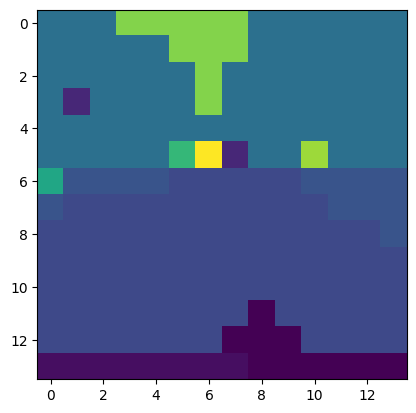

In [138]:
plt.imshow(annots['images'][0]['patch_labels'].reshape(14, 14));

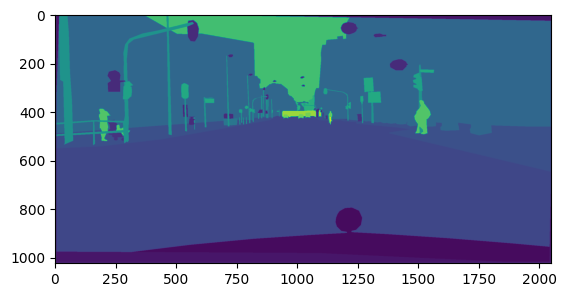

In [139]:
plt.imshow(annots['images'][0]['black_image']);

In [49]:
val_annots

{'sky': 1,
 'road': 2,
 'building': 3,
 'sidewalk': 4,
 'vegetation': 5,
 'static': 6,
 'car': 7,
 'terrain': 8,
 'pole': 9,
 'traffic sign': 10,
 'license plate': 11,
 'bicycle': 12,
 'rider': 13,
 'ego vehicle': 14,
 'out of roi': 15,
 'person': 16,
 'traffic light': 17,
 'truck': 18,
 'parking': 19,
 'cargroup': 20,
 'bicyclegroup': 21,
 'motorcycle': 22,
 'dynamic': 23,
 'ground': 24,
 'fence': 25,
 'caravan': 26,
 'wall': 27,
 'train': 28,
 'rectification border': 29,
 'persongroup': 30,
 'bus': 31,
 'polegroup': 32,
 'bridge': 33,
 'rail track': 34}

In [23]:
annots.keys()

dict_keys(['images', 'annotations', 'categories'])

In [24]:
val_annots

{'images': [{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000097_000019_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 0},
  {'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000161_000019_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 1},
  {'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000072_000019_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 2},
  {'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000028_000019_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 3},
  {'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000016_000019_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 4},
  {'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000069_000019_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 5},
  {'file_name': '/mnt/lwll/lwll-coral/hran

In [ ]:
annots['black_images']

In [25]:
with open("/mnt/lwll/lwll-coral/hrant/gtFine/instances_train_new_split.json", "w") as out_file_train:
    json.dump(annots, out_file_train)

In [29]:
with open("/mnt/lwll/lwll-coral/hrant/gtFine/instances_val_new_split.json", "w") as out_file_val:
    json.dump(val_annots, out_file_val)

In [38]:
with open("/mnt/lwll/lwll-coral/hrant/gtFine/instances_train_new_split.json") as f:
    tmp_train = json.load(f)

In [35]:
with open("/mnt/lwll/lwll-coral/hrant/gtFine/instances_val_new_split.json") as v_f:
    tmp_val = json.load(v_f)

In [36]:
tmp_val.keys()

dict_keys(['images', 'annotations', 'categories'])

In [37]:
tmp_val['categories']

[{'supercategory': 'sky', 'id': 1, 'name': 'sky'},
 {'supercategory': 'road', 'id': 2, 'name': 'road'},
 {'supercategory': 'building', 'id': 3, 'name': 'building'},
 {'supercategory': 'sidewalk', 'id': 4, 'name': 'sidewalk'},
 {'supercategory': 'vegetation', 'id': 5, 'name': 'vegetation'},
 {'supercategory': 'static', 'id': 6, 'name': 'static'},
 {'supercategory': 'car', 'id': 7, 'name': 'car'},
 {'supercategory': 'terrain', 'id': 8, 'name': 'terrain'},
 {'supercategory': 'pole', 'id': 9, 'name': 'pole'},
 {'supercategory': 'traffic sign', 'id': 10, 'name': 'traffic sign'},
 {'supercategory': 'license plate', 'id': 11, 'name': 'license plate'},
 {'supercategory': 'bicycle', 'id': 12, 'name': 'bicycle'},
 {'supercategory': 'rider', 'id': 13, 'name': 'rider'},
 {'supercategory': 'ego vehicle', 'id': 14, 'name': 'ego vehicle'},
 {'supercategory': 'out of roi', 'id': 15, 'name': 'out of roi'},
 {'supercategory': 'person', 'id': 16, 'name': 'person'},
 {'supercategory': 'traffic light', 'id

In [39]:
len(tmp_train['images'])

72

In [40]:
tmp_train['categories']

[{'supercategory': 'sky', 'id': 1, 'name': 'sky'},
 {'supercategory': 'road', 'id': 2, 'name': 'road'},
 {'supercategory': 'sidewalk', 'id': 3, 'name': 'sidewalk'},
 {'supercategory': 'building', 'id': 4, 'name': 'building'},
 {'supercategory': 'vegetation', 'id': 5, 'name': 'vegetation'},
 {'supercategory': 'pole', 'id': 6, 'name': 'pole'},
 {'supercategory': 'static', 'id': 7, 'name': 'static'},
 {'supercategory': 'traffic light', 'id': 8, 'name': 'traffic light'},
 {'supercategory': 'bus', 'id': 9, 'name': 'bus'},
 {'supercategory': 'traffic sign', 'id': 10, 'name': 'traffic sign'},
 {'supercategory': 'car', 'id': 11, 'name': 'car'},
 {'supercategory': 'cargroup', 'id': 12, 'name': 'cargroup'},
 {'supercategory': 'fence', 'id': 13, 'name': 'fence'},
 {'supercategory': 'dynamic', 'id': 14, 'name': 'dynamic'},
 {'supercategory': 'person', 'id': 15, 'name': 'person'},
 {'supercategory': 'rider', 'id': 16, 'name': 'rider'},
 {'supercategory': 'bicycle', 'id': 17, 'name': 'bicycle'},
 {'

In [ ]:
tmp_train['annotations'][0]

In [ ]:
len(tmp_train['categories'])

In [ ]:
tmp_train['images'][0]

In [1]:
target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_200/train/'
# target_path = '/mnt/lwll/lwll-coral/hrant/cs4pc_200/val/'

In [3]:
path_to_cityscapes_images_train = '/mnt/lwll/lwll-coral/hrant/leftImg8bit/train/jena'

In [4]:
path_to_cityscapes_annot_train = '/mnt/lwll/lwll-coral/hrant/gtFine/train/jena/'

In [5]:
os.listdir(path_to_cityscapes_annot_train)

['jena_000085_000019_gtFine_polygons.json',
 'jena_000032_000019_gtFine_polygons.json',
 'jena_000114_000019_gtFine_color.png',
 'jena_000108_000019_gtFine_labelIds.png',
 'jena_000078_000019_gtFine_instanceIds.png',
 'jena_000027_000019_gtFine_instanceIds.png',
 'jena_000101_000019_gtFine_instanceIds.png',
 'jena_000058_000019_gtFine_labelIds.png',
 'jena_000034_000019_gtFine_polygons.json',
 'jena_000078_000019_gtFine_labelIds.png',
 'jena_000000_000019_gtFine_polygons.json',
 'jena_000034_000019_gtFine_color.png',
 'jena_000049_000019_gtFine_instanceIds.png',
 'jena_000071_000019_gtFine_color.png',
 'jena_000066_000019_gtFine_color.png',
 'jena_000046_000019_gtFine_instanceIds.png',
 'jena_000091_000019_gtFine_instanceIds.png',
 'jena_000016_000019_gtFine_instanceIds.png',
 'jena_000040_000019_gtFine_labelIds.png',
 'jena_000003_000019_gtFine_instanceIds.png',
 'jena_000002_000019_gtFine_labelIds.png',
 'jena_000066_000019_gtFine_instanceIds.png',
 'jena_000070_000019_gtFine_polygon

In [30]:
im = Image.open('/mnt/lwll/lwll-coral/hrant/gtFine/train/jena/jena_000007_000019_gtFine_color.png')

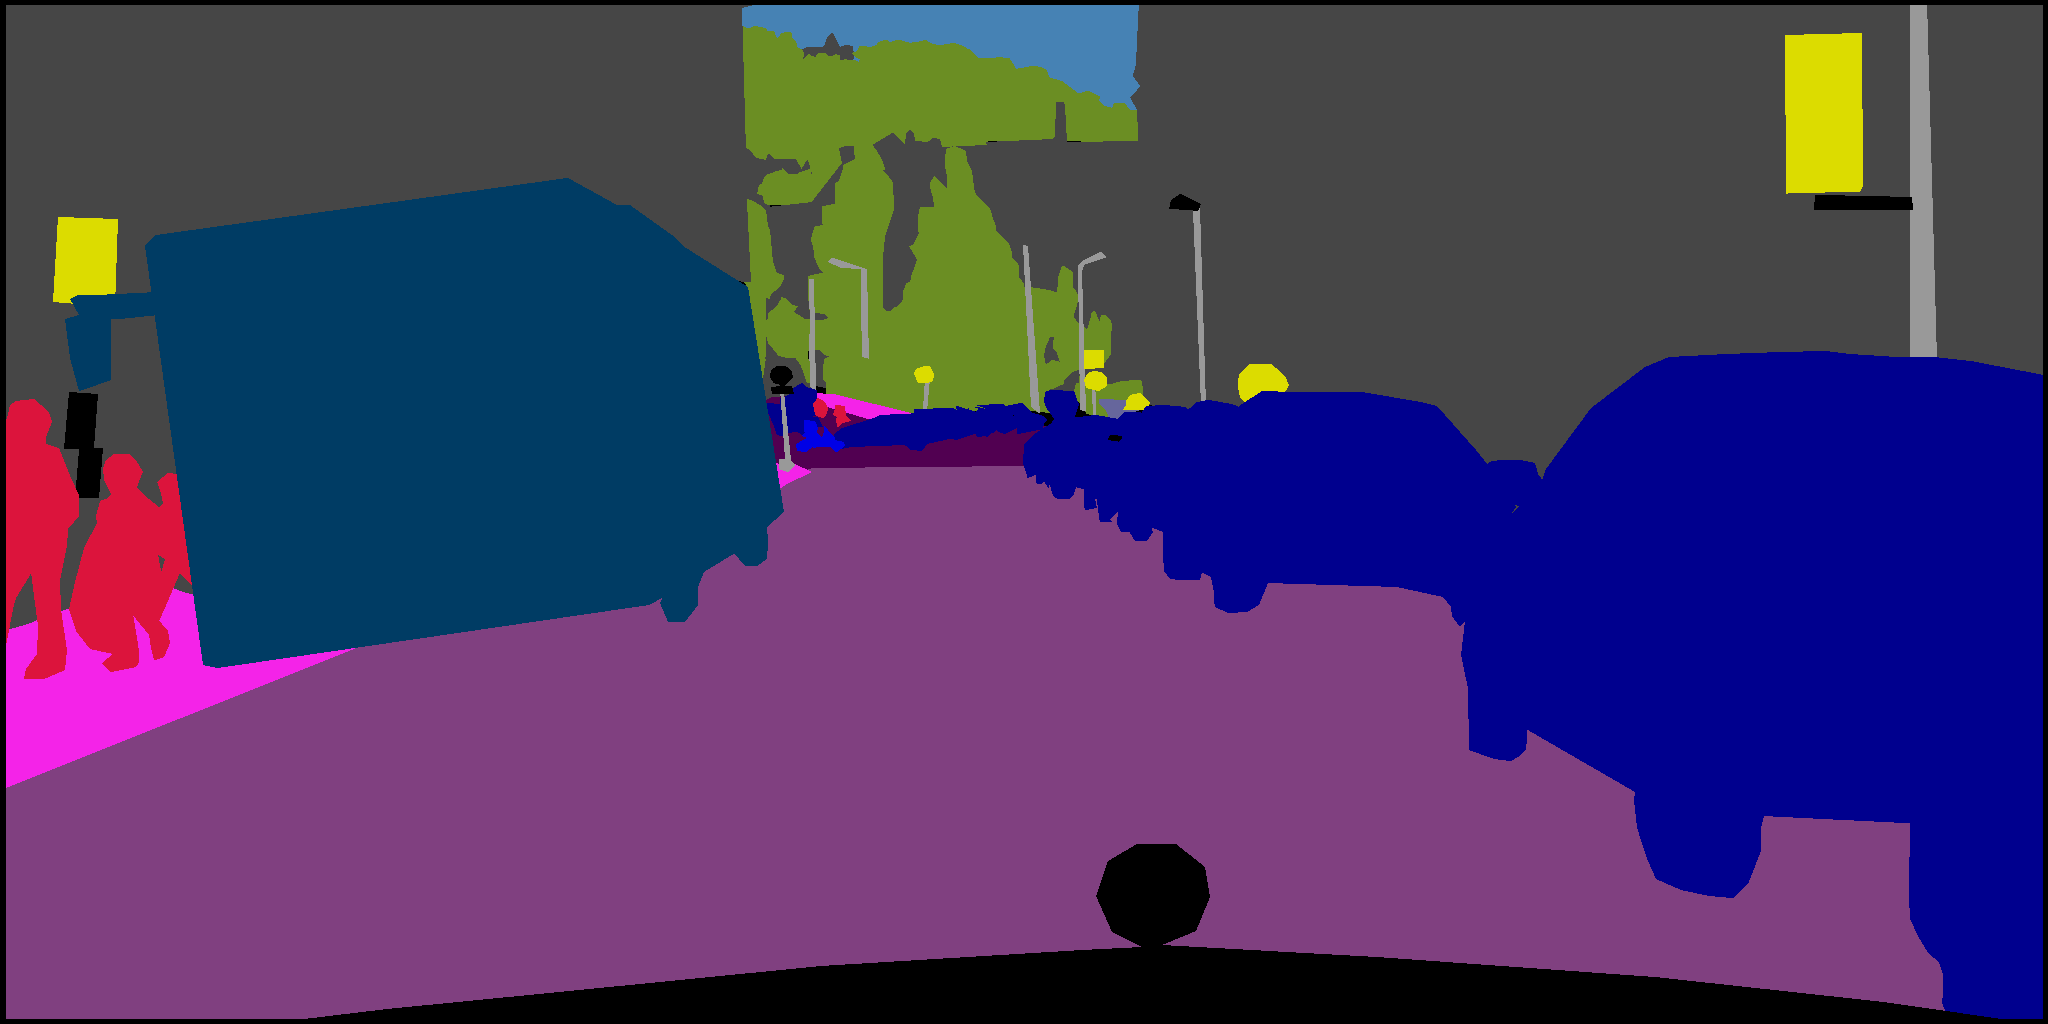

In [31]:
im.show()

In [33]:
np.asarray(im)[0]

array([[  0,   0,   0, 255],
       [  0,   0,   0, 255],
       [  0,   0,   0, 255],
       ...,
       [  0,   0,   0, 255],
       [  0,   0,   0, 255],
       [  0,   0,   0, 255]], dtype=uint8)

In [53]:
val_train_mapping = {v:annots[k] for k, v in val_annots.items()}

In [54]:
val_train_mapping

{1: 1,
 2: 2,
 3: 4,
 4: 3,
 5: 5,
 6: 7,
 7: 11,
 8: 24,
 9: 6,
 10: 10,
 11: 25,
 12: 17,
 13: 16,
 14: 18,
 15: 20,
 16: 15,
 17: 8,
 18: 33,
 19: 29,
 20: 12,
 21: 30,
 22: 22,
 23: 14,
 24: 28,
 25: 13,
 26: 34,
 27: 23,
 28: 27,
 29: 19,
 30: 21,
 31: 9,
 32: 32,
 33: 31,
 34: 26}

In [55]:
json_path = '/home/hkhachatrian/mae/map_from_val_to_train.json'

In [57]:
with open(json_path, 'w') as f:
    json.dump(val_train_mapping, f)

In [60]:
with open(json_path) as f:
    tmp = json.load(f)

tmp

In [62]:
tmp

{'1': 1,
 '2': 2,
 '3': 4,
 '4': 3,
 '5': 5,
 '6': 7,
 '7': 11,
 '8': 24,
 '9': 6,
 '10': 10,
 '11': 25,
 '12': 17,
 '13': 16,
 '14': 18,
 '15': 20,
 '16': 15,
 '17': 8,
 '18': 33,
 '19': 29,
 '20': 12,
 '21': 30,
 '22': 22,
 '23': 14,
 '24': 28,
 '25': 13,
 '26': 34,
 '27': 23,
 '28': 27,
 '29': 19,
 '30': 21,
 '31': 9,
 '32': 32,
 '33': 31,
 '34': 26}

In [86]:
test_img = Image.open('/mnt/lwll/lwll-coral/hrant/gtFine/val/munster/munster_000097_000019_gtFine_labelIds.png')
test_img = np.array(test_img)

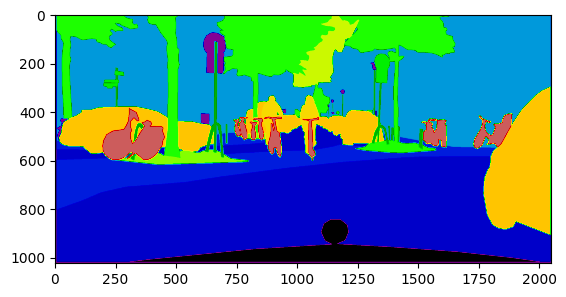

In [89]:
plt.imshow(test_img, cmap='nipy_spectral', vmax=34);

In [93]:
test_img.shape

(1024, 2048)

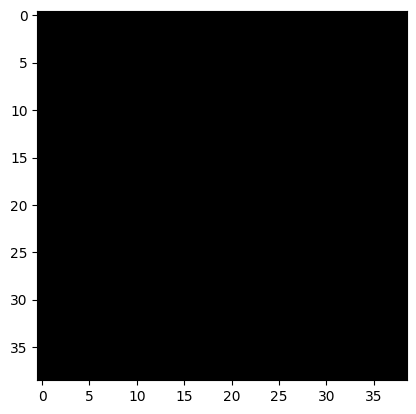

In [97]:
plt.imshow(test_img[21:60, 21:60], cmap='nipy_spectral', vmax=34);

In [98]:
test_img[21:60, 21:60]

array([[21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       ...,
       [21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21],
       [21, 21, 21, ..., 21, 21, 21]], dtype=uint8)

In [92]:
np.unique(test_img[0])

array([3], dtype=uint8)

In [72]:
test_img = np.array(test_img)

In [73]:
np.unique(test_img.flatten(), return_counts=True)

(array([ 1,  3,  4,  7,  8, 11, 17, 20, 21, 22, 23, 25, 26, 33],
       dtype=uint8),
 array([ 81534,  31634,  14737, 634300, 144774, 565268,  19624,   8662,
        249961,  17364,  32499,  17877, 214489,  64429]))

In [74]:
with open('/mnt/lwll/lwll-coral/hrant/gtFine/val/munster/munster_000097_000019_gtFine_polygons.json') as f:
    annotation = json.load(f)

In [75]:
annotation

{'imgHeight': 1024,
 'imgWidth': 2048,
 'objects': [{'label': 'sky',
   'polygon': [[768, 1], [1325, 1], [1245, 334], [968, 359]]},
  {'label': 'road',
   'polygon': [[0, 526],
    [769, 505],
    [998, 446],
    [1128, 443],
    [1302, 494],
    [1705, 505],
    [2048, 496],
    [2048, 1024],
    [0, 1024]]},
  {'label': 'building',
   'polygon': [[976, 299],
    [1023, 302],
    [1034, 300],
    [1057, 299],
    [1058, 293],
    [1071, 293],
    [1086, 292],
    [1086, 282],
    [1104, 283],
    [1110, 281],
    [1127, 281],
    [1130, 284],
    [1141, 277],
    [1135, 275],
    [1140, 265],
    [1134, 262],
    [1148, 239],
    [1145, 202],
    [1145, 175],
    [1151, 151],
    [1156, 147],
    [1160, 150],
    [1161, 155],
    [1164, 157],
    [1183, 157],
    [1187, 146],
    [1191, 139],
    [1193, 132],
    [1192, 127],
    [1198, 118],
    [1195, 110],
    [1198, 105],
    [1221, 96],
    [1268, 1],
    [2047, 1],
    [2046, 540],
    [1827, 562],
    [1640, 562],
    [1519, 53

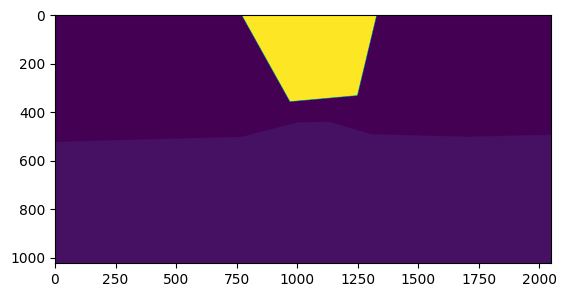

In [85]:
black = np.zeros((1024, 2048))

pts = np.array(annotation['objects'][0]['polygon'], int)
black = cv2.fillPoly(black, [pts], (23, 0))
pts = np.array(annotation['objects'][1]['polygon'], int)
black = cv2.fillPoly(black, [pts], (1, 0))

plt.imshow(black);

In [83]:
points = []
for obj in annotation['objects']:
    if obj['label'] == 'sky':
        points.append(np.array(obj['polygon'], int))

In [84]:
points

[array([[ 768,    1],
        [1325,    1],
        [1245,  334],
        [ 968,  359]])]

root = '/mnt/lwll/lwll-coral/hrant/gtFine/test/'
cities = os.listdir(root)
images = {city: list(set('_'.join(x.split('_')[:3]) for x in os.listdir(os.path.join(root, city)))) for city in cities}
print(sum([len(images[city]) for city in cities]))
test_images = ['/'.join(['gtFine/test', city, name]) for city in cities for name in images[city]]

In [15]:
test_annots = process(test_images, path_to_cityscapes_images_test, path_to_cityscapes_annot_test)

{'images': [{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/test/bielefeld/bielefeld_000000_056226_leftImg8bit.png',
   'height': 1024,
   'width': 2048,
   'id': 0,
   'black_image': array([[3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3],
          ...,
          [3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3],
          [3, 3, 3, ..., 3, 3, 3]], dtype=uint8),
   'patch_labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 

In [17]:
np.save('/home/hkhachatrian/mae/annotations/cs_test.npy', test_annots)

In [39]:
import matplotlib.pyplot as plt

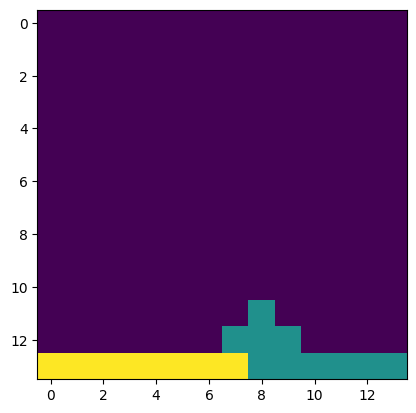

In [55]:
plt.imshow(test_annots['images'][0]['patch_labels'].reshape(14, 14));

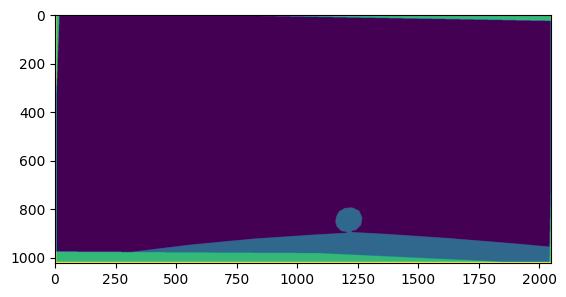

In [56]:
plt.imshow(test_annots['images'][0]['black_image']);

In [44]:
test_annots['images'][0]['file_name']

'/mnt/lwll/lwll-coral/hrant/leftImg8bit/test/bielefeld/bielefeld_000000_056226_leftImg8bit.png'

In [68]:
from PIL import Image
img = Image.open('/mnt/lwll/lwll-coral/hrant/leftImg8bit/test/bielefeld/bielefeld_000000_056226_leftImg8bit.png')

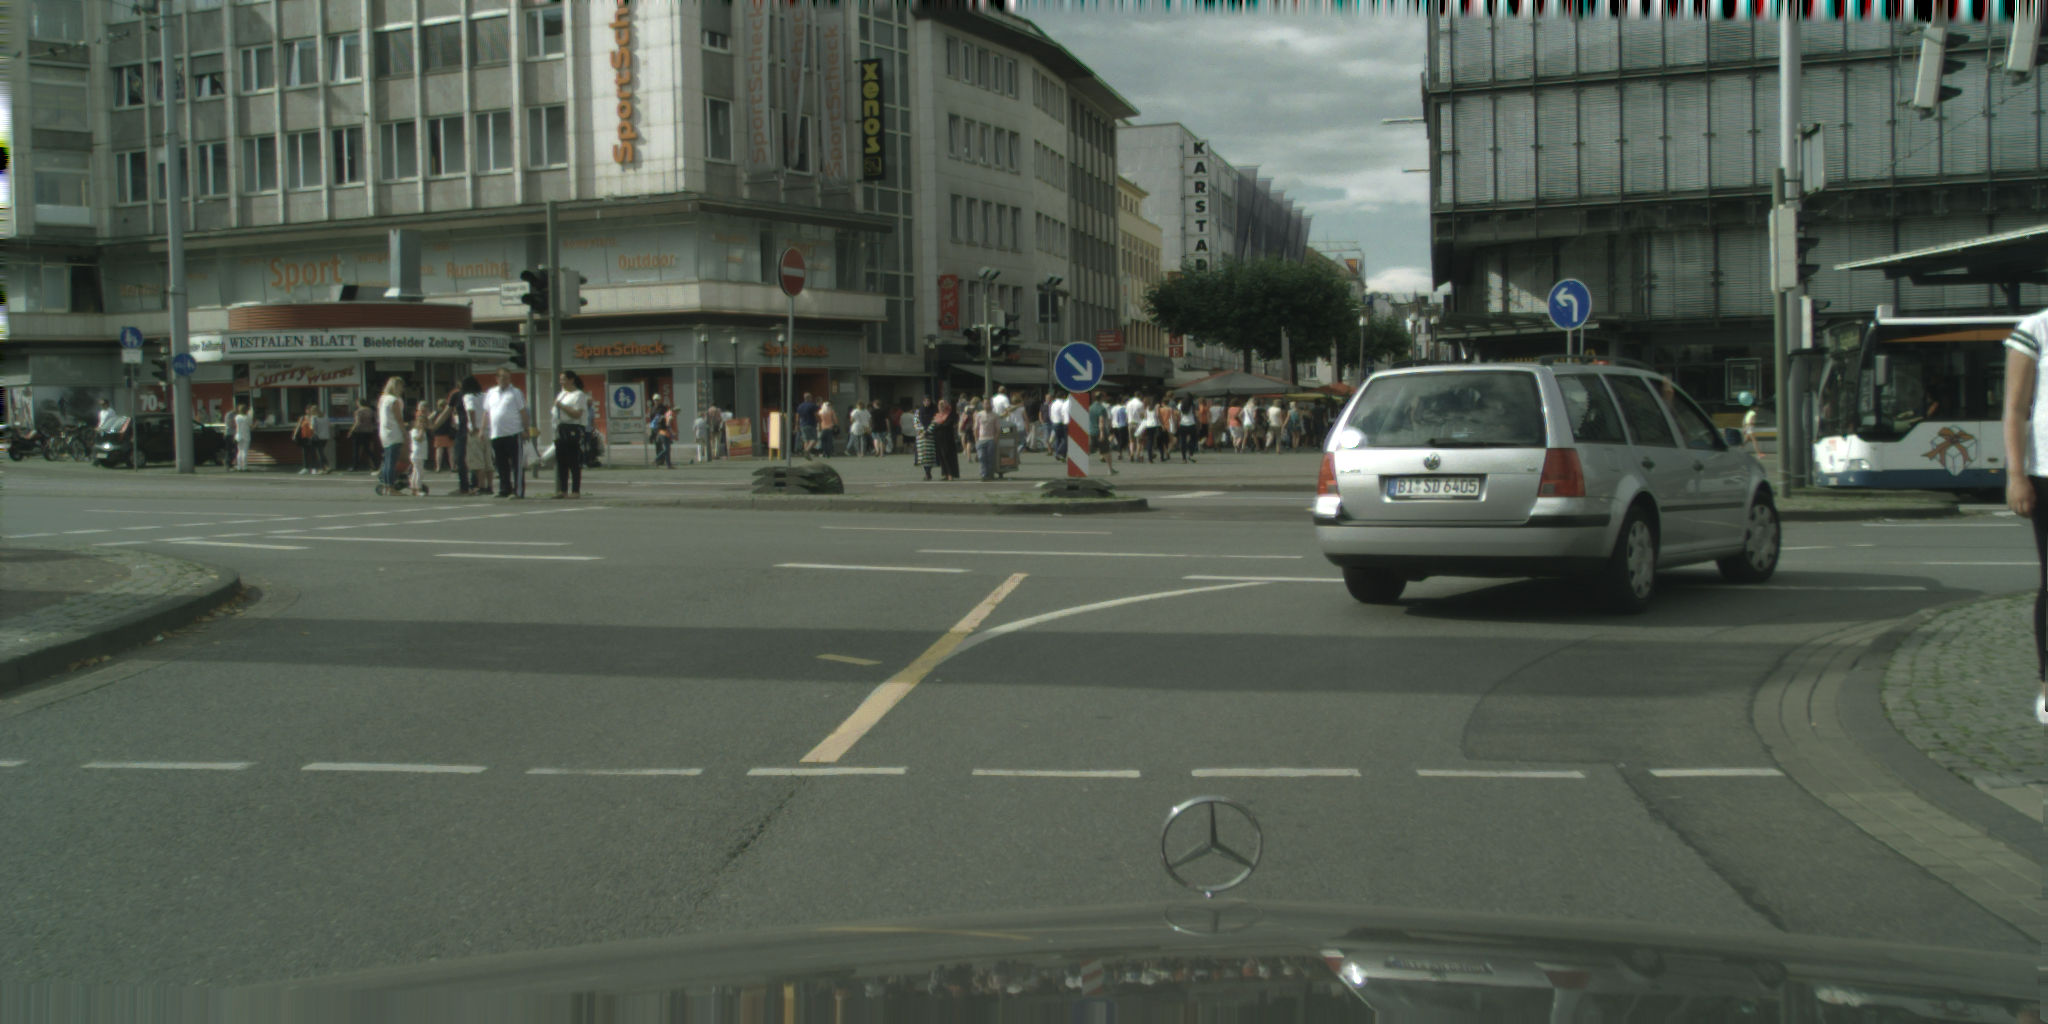

In [69]:
img.show()

In [64]:
image_labelIds = Image.open('/mnt/lwll/lwll-coral/hrant/gtFine/test/bielefeld/bielefeld_000000_056226_gtFine_labelIds.png')

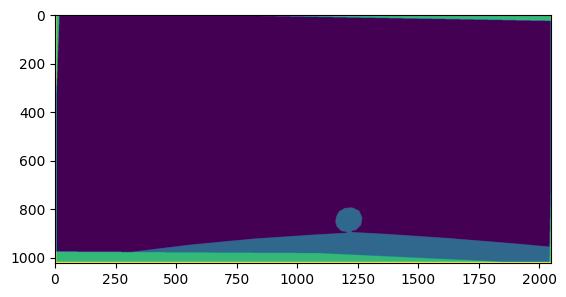

In [65]:
plt.imshow(np.array(image_labelIds))

In [74]:
instances = Image.open('/mnt/lwll/lwll-coral/hrant/gtFine/test/bielefeld/bielefeld_000000_056226_gtFine_instanceIds.png')

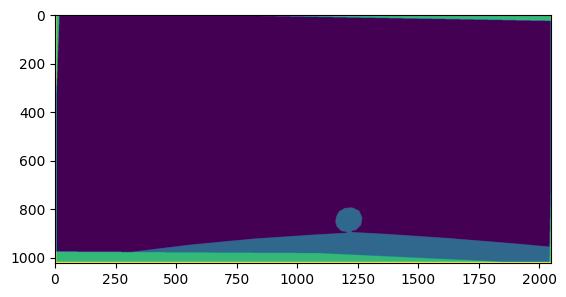

In [75]:
plt.imshow(np.array(instances))

In [71]:
colored = Image.open('/mnt/lwll/lwll-coral/hrant/gtFine/test/bielefeld/bielefeld_000000_056226_gtFine_color.png')

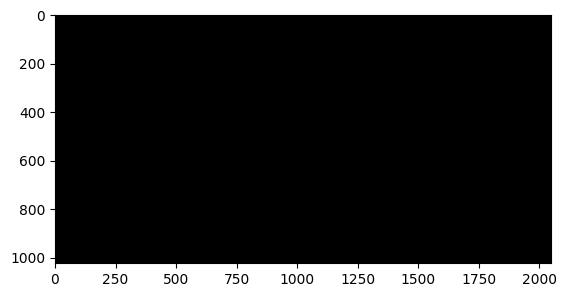

In [72]:
plt.imshow(np.array(colored))

In [73]:
import json

In [78]:
with open('/mnt/lwll/lwll-coral/hrant/gtFine/test/bielefeld/bielefeld_000000_066195_gtFine_polygons.json') as pol:
    polygons = json.load(pol)

In [79]:
polygons

{'imgHeight': 1024,
 'imgWidth': 2048,
 'objects': [{'label': 'ego vehicle',
   'polygon': [[24, 1023],
    [25, 1015],
    [386, 970],
    [557, 949],
    [822, 924],
    [1063, 908],
    [1203, 900],
    [1203, 896],
    [1179, 892],
    [1161, 873],
    [1156, 856],
    [1158, 838],
    [1164, 823],
    [1172, 811],
    [1195, 798],
    [1223, 796],
    [1252, 809],
    [1265, 838],
    [1260, 867],
    [1239, 888],
    [1221, 892],
    [1221, 897],
    [1366, 905],
    [1621, 922],
    [1881, 943],
    [2047, 958],
    [2047, 1023]]},
  {'label': 'rectification border',
   'polygon': [[416, 0], [2047, 28], [2047, 0]]},
  {'label': 'rectification border',
   'polygon': [[2047, 509], [2047, 1023], [2037, 1023]]},
  {'label': 'rectification border', 'polygon': [[0, 0], [0, 474], [17, 0]]},
  {'label': 'rectification border',
   'polygon': [[1086, 983], [0, 977], [0, 1023], [1937, 1023]]},
  {'label': 'out of roi',
   'polygon': [[0, 0],
    [2048, 0],
    [2048, 1024],
    [0, 1024],


In [80]:
with open('/mnt/lwll/lwll-coral/hrant/gtFine/test/bonn/bonn_000045_000019_gtFine_polygons.json') as pol:
    polygons = json.load(pol)

In [81]:
polygons

{'imgHeight': 1024,
 'imgWidth': 2048,
 'objects': [{'label': 'ego vehicle',
   'polygon': [[271, 1023],
    [387, 1009],
    [549, 993],
    [821, 966],
    [1082, 950],
    [1142, 947],
    [1112, 932],
    [1096, 896],
    [1108, 861],
    [1137, 844],
    [1175, 844],
    [1204, 867],
    [1209, 897],
    [1195, 931],
    [1161, 945],
    [1376, 957],
    [1654, 977],
    [1883, 1002],
    [2028, 1023]]},
  {'label': 'out of roi',
   'polygon': [[0, 0],
    [2048, 0],
    [2048, 1024],
    [0, 1024],
    [0, 0],
    [5, 5],
    [5, 1019],
    [2043, 1019],
    [2043, 5],
    [5, 5]]}]}

In [214]:
import cv2

# img_path - the path where the original image is stored
# save_path - the path to store the blutted image
# kernel_size - the size of the window for the blur e.g. [10, 10]

def image_blur(img_path, save_path, kernel_size):
    img = cv2.imread(img_path)
    blr_img = cv2.blur(img, kernel_size)
    cv2.imwrite(save_path, blr_img)
#     plt.imshow(blr_img)

In [468]:
# img_path - the path where the original image is stored
# save_path - the path to store the blutted image
# mean_noise - mean of the Gaussian noise to be added
# st_dev_noise - standard deviation of the Gaussian noise to be added

def image_Gaussian_Noise(img_path, save_path, mean_noise, st_dev_noise):
    img = cv2.imread(img_path)
    noise_img = np.clip(img + np.random.normal(mean_noise, st_dev_noise, img.shape), 0, 255).astype(np.uint8)
    cv2.imwrite(save_path, noise_img)
#     plt.imshow(noise_img)

In [199]:
# blurring the images

from tqdm.notebook import tqdm

# pth = '../annotations/cs/cs4pc_256_val.npy'

for i in range(1, 5):
    pth = '/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val.npy'
    annots_blur = np.load(pth, allow_pickle=True).item();
    img_path_save = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_blur_' + str(i) + '/'
    for idx, curImg in enumerate(tqdm(annots_blur['images'])):
        imgPth = curImg['file_name']
        imgPthSave = img_path_save + 'blur_' + str(i) + '_' + imgPth.split('/')[-1]
        image_blur(imgPth, imgPthSave, [i*10, i*10])
        annots_blur['images'][idx]['file_name'] = imgPthSave
    np.save('/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val_blur_' + str(i) + '.npy', annots_blur)


  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

In [232]:
# # adding Gaussian noise to the images

# from tqdm.notebook import tqdm

# for i in range(1, 5):
#     pth = '/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val.npy'
#     annots_noise = np.load(pth, allow_pickle=True).item();
#     img_path_save = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_noise_' + str(i) + '/'
#     for idx, curImg in enumerate(tqdm(annots_noise['images'])):
#         imgPth = curImg['file_name']
#         imgPthSave = img_path_save + 'noise_' + str(i) + '_' + imgPth.split('/')[-1]
#         image_Gaussian_Noise(imgPth, imgPthSave, 0, 50 * i)
#         annots_noise['images'][idx]['file_name'] = imgPthSave
#     np.save('/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val_noise_' + str(i) + '.npy', annots_noise)


  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

In [470]:
# pth = '/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val.npy'
# pth = '/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val_blur_4.npy'

In [469]:
# adding Gaussian noise to the images with st dev 10, 20, 30, 40

from tqdm.notebook import tqdm

for i in range(10, 41, 10):
    pth = '/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val.npy'
    annots_noise = np.load(pth, allow_pickle=True).item();
    img_path_save = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_noise_' + str(i) + '/'
    for idx, curImg in enumerate(tqdm(annots_noise['images'])):
        imgPth = curImg['file_name']
        imgPthSave = img_path_save + 'noise_' + str(i) + '_' + imgPth.split('/')[-1]
        image_Gaussian_Noise(imgPth, imgPthSave, 0, i)
        annots_noise['images'][idx]['file_name'] = imgPthSave
    np.save('/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val_noise_' + str(i) + '.npy', annots_noise)


  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

In [471]:
!ls

36				     snap
build				     space
c:				     SSL-playground
chem				     SSL-playground_submission
ContrastiveSeg			     tmp_train.npy
dataset_prep			     tmux-client-142999.log
dota.yaml			     tmux-client-143002.log
Hakob				     tmux-client-143042.log
inference_results.ipynb		     tmux-client-143045.log
mae				     tmux-client-143922.log
mae_visualize_vit_large_ganloss.pth  tmux-client-144601.log
mahnerak			     unbiased_teacher
miniconda3			     visdrone_stage3
Miniconda3-latest-Linux-x86_64.sh    wget-log
nightowls_stage_3		     wilds
nvtop				     wilds_logs
practice			     wilds.yml
__pycache__


In [ ]:
# adding frequency-based random noise to the images

from tqdm.notebook import tqdm
noise_freq_level_max = 4
mean_noise, st_dev_noise = 0, 40

for i in range(1, noise_freq_level_max + 1):
    pth = '/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val.npy'
    annots_freq_noise = np.load(pth, allow_pickle=True).item();
    img_path_save = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_frequency_noise_' + str(i) + '/'
    for idx, curImg in enumerate(tqdm(annots_freq_noise['images'])):
        imgPth = curImg['file_name']
        imgPthSave = img_path_save + 'frequency_noise_' + str(i) + '_' + imgPth.split('/')[-1]
        image_Frequency_Based_Random_Noise(imgPth, imgPthSave, mean_noise, st_dev_noise, i-1, noise_freq_level_max)
        annots_freq_noise['images'][idx]['file_name'] = imgPthSave
    np.save('/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val_frequency_noise_' + str(i) + '.npy', annots_freq_noise)


  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/960 [00:00<?, ?it/s]

In [141]:
# pth = '/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val_blur_2.npy'
# annots_blur = np.load(pth, allow_pickle=True).item()

# print(annots_blur['images'][10])

'/home/hkhachatrian'

In [130]:
# ls -lah /mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/val/munster

In [328]:
# from matplotlib import pyplot as plt


# print(x['images'])
# img_path = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/val/munster/munster_000097_000019_leftImg8bit.png'
# img_path =  '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_blur_4/blur_4_frankfurt_000001_067092_leftImg8bit.256_1_0.png'
# img_path =  '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_noise_4/noise_4_frankfurt_000001_067092_leftImg8bit.256_1_0.png'
# img_path =  '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_blur_4/blur_4_lindau_000023_000019_leftImg8bit.256_2_4.png'
# img_path =  '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_noise_1/noise_1_lindau_000023_000019_leftImg8bit.256_2_4.png'
# img = cv2.imread(img_path)

# plt.imshow(img)

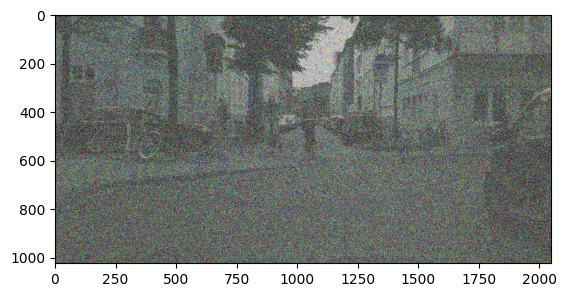

In [224]:
# image_blur(img_path, '', [20, 20])
image_Gaussian_Noise(img_path, '', 0, 200)

In [83]:
img_path_save = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_' + 'val_noise_' + str(2)

print(img_path_save)

/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_noise_2


In [230]:
ls /mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_noise_1

In [378]:
import cv2

def image_Frequency_Based_Random_Noise(img_path, save_path, mean_noise, st_dev_noise, noise_freq_level, noise_freq_level_max):
    img = cv2.imread(img_path)
    
    imgR, imgRFreq, noiseR = image_Frequency_Based_Random_Noise_channel(img[:, :, 0], mean_noise, st_dev_noise, noise_freq_level, noise_freq_level_max)
    imgG, imgGFreq, noiseG = image_Frequency_Based_Random_Noise_channel(img[:, :, 1], mean_noise, st_dev_noise, noise_freq_level, noise_freq_level_max)
    imgB, imgBFreq, noiseB = image_Frequency_Based_Random_Noise_channel(img[:, :, 2], mean_noise, st_dev_noise, noise_freq_level, noise_freq_level_max)    
#     cv2.imwrite(save_path, np.stack((imgR, imgG, imgB), axis=2))
    return np.stack((imgR, imgG, imgB), axis=2), np.stack((imgRFreq, imgGFreq, imgBFreq), axis=2), np.stack((noiseR, noiseG, noiseB), axis=2)


In [376]:
def image_Frequency_Based_Random_Noise_channel(img, mean_noise, st_dev_noise, noise_freq_level, noise_freq_level_max):
    
    rows, cols = img.shape

    img_noise = np.random.normal(mean_noise, st_dev_noise, img.shape)
    
    f = np.fft.fft2(img_noise)
    # Shift the zero-frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    # Define the center of the Fourier spectrum
    cx, cy = fshift.shape[1] // 2, fshift.shape[0] // 2

    # Define the inner and outer radii of the radial mask
    r_inner, r_outer = noise_freq_level/noise_freq_level_max * np.sqrt(cx**2 + cy**2), (noise_freq_level + 1)/noise_freq_level_max * np.sqrt(cx**2 + cy**2)    
#     print(np.sqrt(cx**2 + cy**2))
#     print(noise_freq_level * np.sqrt(cx**2 + cy**2)/noise_freq_level_max , (noise_freq_level + 1) * np.sqrt(cx**2 + cy**2)/noise_freq_level_max)
    
    # Create a meshgrid of distances from the center of the Fourier spectrum
    x, y = np.meshgrid(np.arange(fshift.shape[1]) - cx, np.arange(fshift.shape[0]) - cy)
    d = np.sqrt(x**2 + y**2)
    # Create a binary mask with ones for frequencies within the specified range
    mask = np.logical_and(d >= r_inner, d <= r_outer)
#     plt.imshow(mask)
    # Apply the mask to the Fourier spectrum
    fshift[~mask] = 0
#     plt.imshow(np.abs(fshift))
    # Shift the zero-frequency component back to the corner of the spectrum
    f = np.fft.ifftshift(fshift)
    # Compute the inverse Fourier transform to obtain the filtered image
#     img_filtered = np.fft.ifft2(f).real.astype(np.uint8)
    img_filtered = np.fft.ifft2(f).real
#     print(np.min(img + img_filtered), np.max(img + img_filtered))
#     plt.imshow(img_filtered)
    fbrnIMG = np.clip(img + img_filtered, 0, 255).astype(np.uint8)
#     plt.imshow(fbrnIMG, vmin=0, vmax=255)

    return fbrnIMG, fshift, img_filtered
    

In [318]:
# # ls ../annotations/cs/
# X = np.load('../annotations/cs/cs4pc_256_val_noise_1.npy', allow_pickle=True).item();
# print(len(X['images']))

# X = np.load('/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val.npy', allow_pickle=True).item();
# # print(len(X['images']))
# print(X['images'][10])

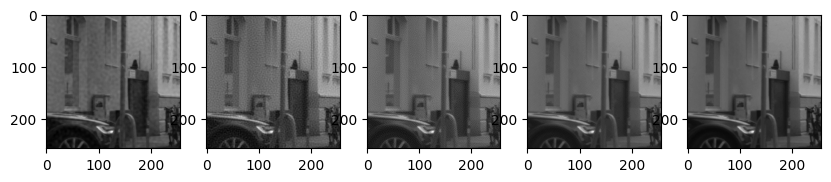

In [319]:
img_path = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256/val/munster_000097_000019_leftImg8bit.256_1_2.png'

img = cv2.imread(img_path, 0)
# plt.imshow(img)


fig, axs = plt.subplots(1, 5, figsize=(10, 3))
A = []
for i in range(5):
    A.append(image_Frequency_Based_Random_Noise_channel(img, 0, 10, i, 5))
    axs[i].imshow(A[i], cmap='gray')

plt.show()

'/home/hkhachatrian'

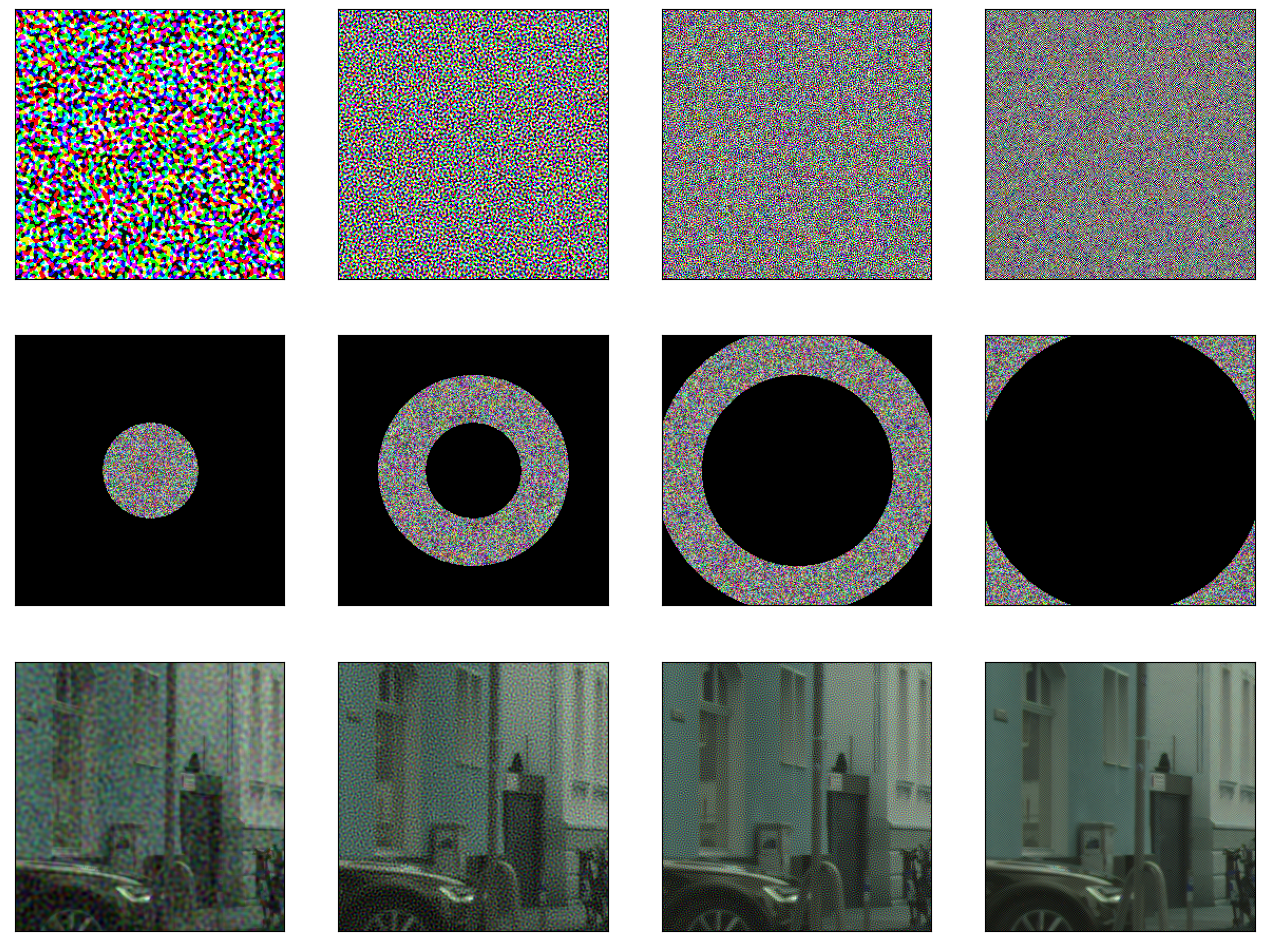

In [397]:
img_path = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256/val/munster_000097_000019_leftImg8bit.256_1_2.png'

img = cv2.imread(img_path)

A = [[], [], []]

# fig, axs = plt.subplots(3, 5, figsize=(10, 10))
# fig, axs = plt.subplots(3, 4, figsize=(10, 10))
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

meanN, varN = 0, 40
freqLevel = 4
for i in range(freqLevel):
#     for i in range(freqLevel + 1):
#     recImage = image_Frequency_Based_Random_Noise(img_path, '', meanN, varN, i, freqLevel)
    recImage, recImageFreq, noise = image_Frequency_Based_Random_Noise(img_path, '', meanN, varN, i, freqLevel)
    A[0].append(noise.astype(np.uint8))
    A[1].append(np.abs(recImageFreq).astype(np.uint8))
    A[2].append(recImage)
    axs[0][i].imshow(A[0][i])
    axs[1][i].imshow(np.abs(A[1][i]))
    axs[2][i].imshow(np.abs(A[2][i]))
    axs[0][i].set_xticks([])
    axs[0][i].set_yticks([])
    axs[1][i].set_xticks([])
    axs[1][i].set_yticks([])
    axs[2][i].set_xticks([])
    axs[2][i].set_yticks([])
plt.show()
plt.savefig("myplot.png", format="png")

In [401]:
# image_Frequency_Based_Random_Noise(img_path, '', 0, 40, 3, 4);
# plt.imshow(image_Frequency_Based_Random_Noise(img_path, '', 0, 50, 3, 4))

In [360]:
# X = np.load('/home/hkhachatrian/mae/annotations/cs/cs4pc_256_val_frequency_noise_4.npy', allow_pickle=True).item()
# print(X.keys())
# print(X['images'])

In [361]:
# img = cv2.imread('/mnt/lwll/lwll-coral/hrant/vision/images/cs/cs4pc_256_val_frequency_noise_1/frequency_noise_1_munster_000097_000019_leftImg8bit.256_0_0.png')
# plt.imshow(img)